<a href="https://colab.research.google.com/github/MilerDiazZevallos/Arequipa-Covid-19/blob/master/Mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import requests 

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [3]:
download_url("https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip", "Region_Mobility_Report_CSVs.zip")

In [4]:
import zipfile
with zipfile.ZipFile("Region_Mobility_Report_CSVs.zip", 'r') as zip_ref:
    zip_ref.extractall("Region_Mobility_Report_CSVs")

In [5]:
mondays = [pd.to_datetime('2020-03-21'), pd.to_datetime('2020-06-22'), pd.to_datetime('2020-09-22'), pd.to_datetime('2020-12-22')]

In [6]:
data_raw_francia = pd.read_csv("Region_Mobility_Report_CSVs/2020_FR_Region_Mobility_Report.csv")
data_raw_italia = pd.read_csv("Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv")
data_raw_españa = pd.read_csv("Region_Mobility_Report_CSVs/2020_ES_Region_Mobility_Report.csv")
data_raw_suiza = pd.read_csv("Region_Mobility_Report_CSVs/2020_CH_Region_Mobility_Report.csv")

data_raw_peru = pd.read_csv("Region_Mobility_Report_CSVs/2020_PE_Region_Mobility_Report.csv")

# Principales Paises

In [7]:
data_francia = data_raw_francia.groupby(['date'])['parks_percent_change_from_baseline'].mean()
data_italia = data_raw_italia.groupby(['date'])['parks_percent_change_from_baseline'].mean()
data_españa = data_raw_españa.groupby(['date'])['parks_percent_change_from_baseline'].mean()
data_suiza = data_raw_suiza.groupby(['date'])['parks_percent_change_from_baseline'].mean()

data_francia = data_francia.reset_index()
data_italia = data_italia.reset_index()
data_españa = data_españa.reset_index()
data_suiza = data_suiza.reset_index()

data_francia['pais'] = 'francia'
data_italia['pais'] = 'italia'
data_españa['pais'] = 'españa'
data_suiza['pais'] = 'suiza'

data_francia['date'] = pd.to_datetime(data_francia['date'])
data_italia['date'] = pd.to_datetime(data_italia['date'])
data_españa['date'] = pd.to_datetime(data_españa['date'])
data_suiza['date'] = pd.to_datetime(data_suiza['date'])

data = pd.concat([data_francia,data_italia,data_españa, data_suiza])

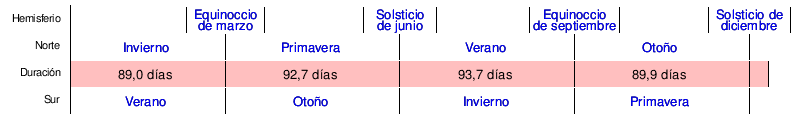


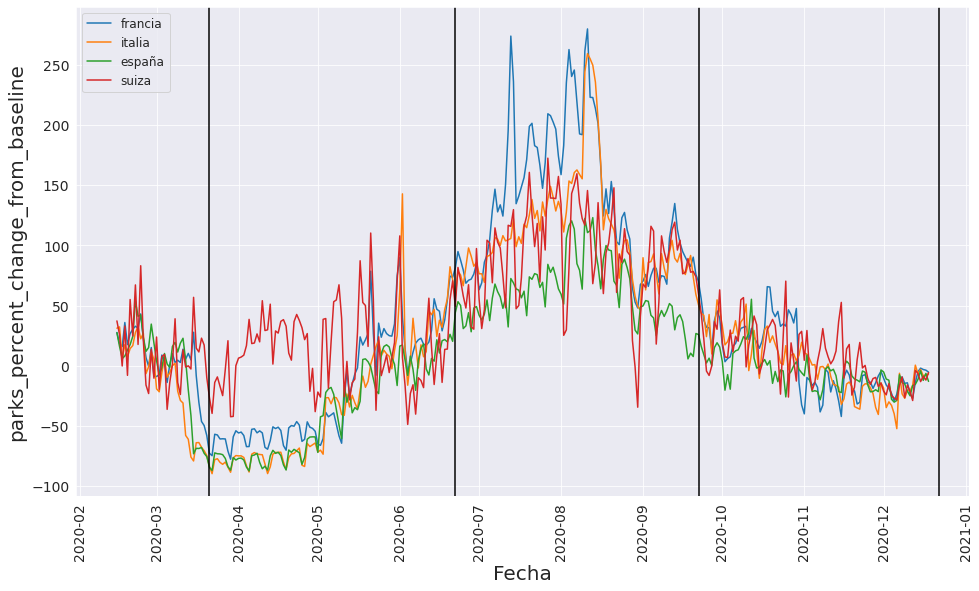

In [25]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=data, x="date", y="parks_percent_change_from_baseline",  ax=ax, hue='pais')
plt.xticks(rotation=90)

for date in mondays:
    ax.axvline(date, color='black')

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('parks_percent_change_from_baseline', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

plt.show()

# Suiza

In [9]:
data_raw_suiza

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,2020-02-15,-1.0,-1.0,31.0,6.0,-2.0,-1.0
1,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,2020-02-16,10.0,12.0,30.0,8.0,-2.0,-1.0
2,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,2020-02-17,-3.0,-4.0,-3.0,-2.0,-1.0,1.0
3,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,2020-02-18,3.0,1.0,34.0,3.0,-2.0,1.0
4,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,2020-02-19,-4.0,-4.0,-11.0,-4.0,-3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,CH,Switzerland,Zurich,NaN,NaN,CH-ZH,NaN,2020-12-14,-22.0,0.0,3.0,-34.0,-28.0,13.0
8023,CH,Switzerland,Zurich,NaN,NaN,CH-ZH,NaN,2020-12-15,-21.0,3.0,7.0,-33.0,-26.0,14.0
8024,CH,Switzerland,Zurich,NaN,NaN,CH-ZH,NaN,2020-12-16,-21.0,0.0,-2.0,-34.0,-26.0,14.0
8025,CH,Switzerland,Zurich,NaN,NaN,CH-ZH,NaN,2020-12-17,-21.0,7.0,-4.0,-33.0,-27.0,13.0


In [10]:
data_suiza_retail = data_raw_suiza.groupby(['date'])['retail_and_recreation_percent_change_from_baseline'].mean()
data_suiza_grocery = data_raw_suiza.groupby(['date'])['grocery_and_pharmacy_percent_change_from_baseline'].mean()
data_suiza_parks = data_raw_suiza.groupby(['date'])['parks_percent_change_from_baseline'].mean()
data_suiza_transit = data_raw_suiza.groupby(['date'])['transit_stations_percent_change_from_baseline'].mean()
data_suiza_workplaces = data_raw_suiza.groupby(['date'])['workplaces_percent_change_from_baseline'].mean()
data_suiza_residential = data_raw_suiza.groupby(['date'])['residential_percent_change_from_baseline'].mean()

data_suiza_retail = data_suiza_retail.reset_index()
data_suiza_grocery = data_suiza_grocery.reset_index()
data_suiza_parks = data_suiza_parks.reset_index()
data_suiza_transit = data_suiza_transit.reset_index()
data_suiza_workplaces = data_suiza_workplaces.reset_index()
data_suiza_residential = data_suiza_residential.reset_index()

data_suiza_retail['date'] = pd.to_datetime(data_suiza_retail['date'])
data_suiza_grocery['date'] = pd.to_datetime(data_suiza_grocery['date'])
data_suiza_parks['date'] = pd.to_datetime(data_suiza_parks['date'])
data_suiza_transit['date'] = pd.to_datetime(data_suiza_transit['date'])
data_suiza_workplaces['date'] = pd.to_datetime(data_suiza_workplaces['date'])
data_suiza_residential['date'] = pd.to_datetime(data_suiza_residential['date'])

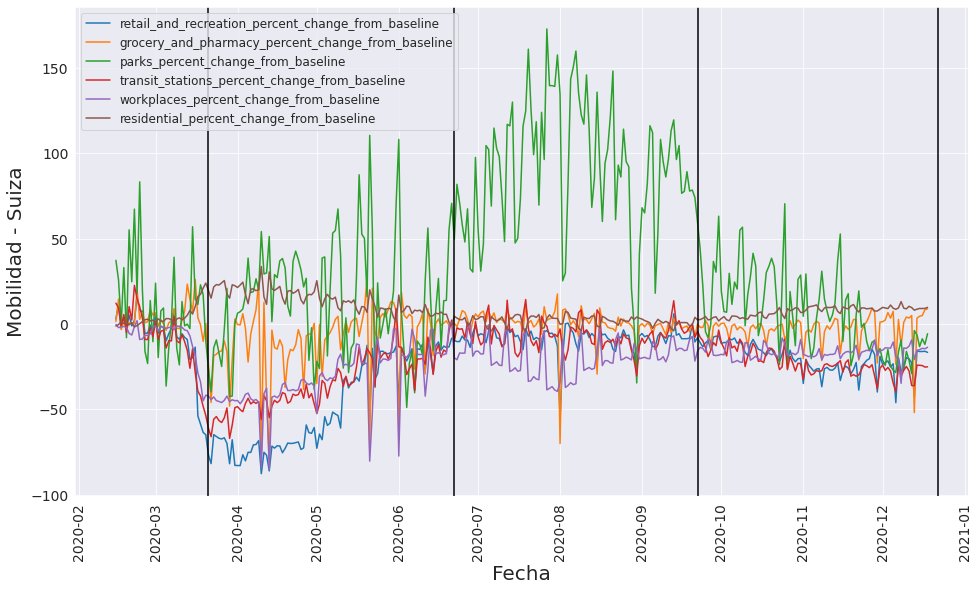

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=data_suiza_retail, x="date", y="retail_and_recreation_percent_change_from_baseline", label='retail_and_recreation_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_suiza_grocery, x="date", y="grocery_and_pharmacy_percent_change_from_baseline", label='grocery_and_pharmacy_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_suiza_parks, x="date", y="parks_percent_change_from_baseline", label='parks_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_suiza_transit, x="date", y="transit_stations_percent_change_from_baseline", label='transit_stations_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_suiza_workplaces, x="date", y="workplaces_percent_change_from_baseline", label='workplaces_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_suiza_residential, x="date", y="residential_percent_change_from_baseline", label='residential_percent_change_from_baseline',  ax=ax)
plt.xticks(rotation=90)

for date in mondays:
    ax.axvline(date, color='black')

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Mobilidad - Suiza', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

#index = data_suiza['date'].values
#values = data_suiza['workplaces_percent_change_from_baseline'].values
#for i,j in zip(index,values):
#        if i in mondays:
#            ax.annotate(str(round(j, 2)),xy=(i,j+0.1), arrowprops=dict(facecolor='black', shrink=0.05),) 
plt.show()

# Geneva

In [12]:
data_raw_geneva = data_raw_suiza[data_raw_suiza['sub_region_1'] == 'Geneva']
data_raw_geneva

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2632,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-02-15,-8.0,-5.0,38.0,-6.0,-7.0,-2.0
2633,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-02-16,10.0,29.0,60.0,2.0,-3.0,-1.0
2634,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-02-17,-6.0,-6.0,6.0,4.0,-1.0,1.0
2635,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-02-18,1.0,1.0,62.0,3.0,1.0,0.0
2636,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-02-19,-5.0,-3.0,6.0,-2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-12-14,-33.0,-2.0,-30.0,-44.0,-27.0,11.0
2936,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-12-15,-35.0,1.0,-38.0,-39.0,-27.0,11.0
2937,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-12-16,-32.0,7.0,-32.0,-37.0,-24.0,10.0
2938,CH,Switzerland,Geneva,NaN,NaN,CH-GE,NaN,2020-12-17,-32.0,6.0,-32.0,-39.0,-25.0,11.0


In [13]:
data_geneva_retail = data_raw_geneva[['date','retail_and_recreation_percent_change_from_baseline']]
data_geneva_grocery = data_raw_geneva[['date','grocery_and_pharmacy_percent_change_from_baseline']]
data_geneva_parks = data_raw_geneva[['date','parks_percent_change_from_baseline']]
data_geneva_transit = data_raw_geneva[['date','transit_stations_percent_change_from_baseline']]
data_geneva_workplaces = data_raw_geneva[['date','workplaces_percent_change_from_baseline']]
data_geneva_residential = data_raw_geneva[['date','residential_percent_change_from_baseline']]

#data_geneva_retail = data_geneva_retail.reset_index()
#data_geneva_grocery = data_geneva_grocery.reset_index()
#data_geneva_parks = data_geneva_parks.reset_index()
#data_geneva_transit = data_geneva_transit.reset_index()
#data_geneva_workplaces = data_geneva_workplaces.reset_index()
#data_geneva_residential = data_geneva_residential.reset_index()

#data_geneva = pd.concat([data_francia,data_italia,data_españa, data_suiza])

#data_geneva['pais'] = 'geneva'

data_geneva_retail['date'] = pd.to_datetime(data_geneva_retail['date'])
data_geneva_grocery['date'] = pd.to_datetime(data_geneva_grocery['date'])
data_geneva_parks['date'] = pd.to_datetime(data_geneva_parks['date'])
data_geneva_transit['date'] = pd.to_datetime(data_geneva_transit['date'])
data_geneva_workplaces['date'] = pd.to_datetime(data_geneva_workplaces['date'])
data_geneva_residential['date'] = pd.to_datetime(data_geneva_residential['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

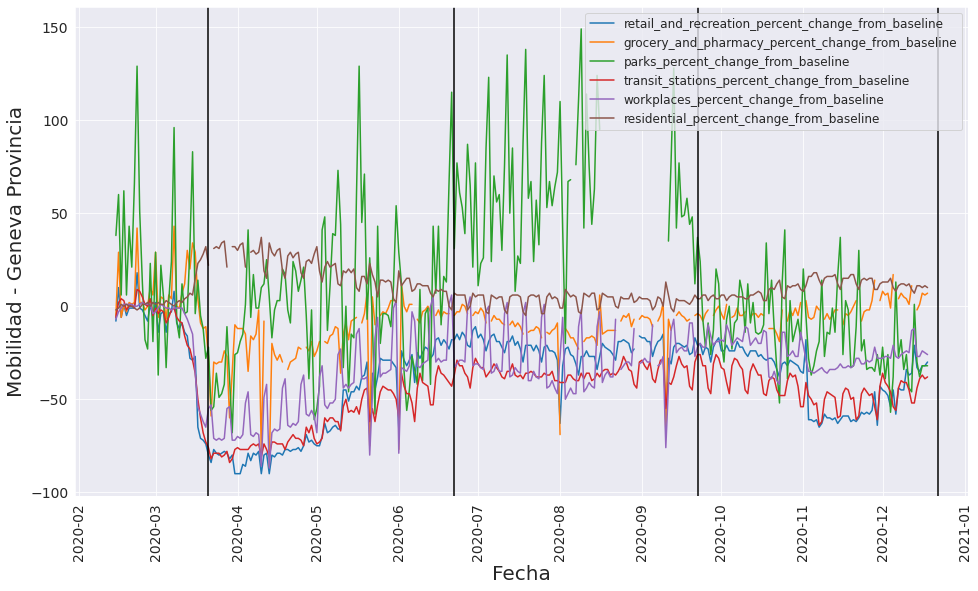

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=data_geneva_retail, x="date", y="retail_and_recreation_percent_change_from_baseline", label='retail_and_recreation_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_geneva_grocery, x="date", y="grocery_and_pharmacy_percent_change_from_baseline", label='grocery_and_pharmacy_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_geneva_parks, x="date", y="parks_percent_change_from_baseline", label='parks_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_geneva_transit, x="date", y="transit_stations_percent_change_from_baseline", label='transit_stations_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_geneva_workplaces, x="date", y="workplaces_percent_change_from_baseline", label='workplaces_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_geneva_residential, x="date", y="residential_percent_change_from_baseline", label='residential_percent_change_from_baseline',  ax=ax)
plt.xticks(rotation=90)

for date in mondays:
    ax.axvline(date, color='black')

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Mobilidad - Geneva Provincia', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

#index = data_geneva['date'].values
#values = data_geneva['workplaces_percent_change_from_baseline'].values
#for i,j in zip(index,values):
#        if i in mondays:
#            ax.annotate(str(round(j, 2)),xy=(i,j+0.1), arrowprops=dict(facecolor='black', shrink=0.05),) 

plt.show()

# Peru

In [15]:
data_raw_peru

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,PE,Peru,NaN,NaN,NaN,NaN,NaN,2020-02-15,4.0,1.0,3.0,3.0,0.0,-1.0
1,PE,Peru,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,0.0,-2.0,2.0,0.0,0.0
2,PE,Peru,NaN,NaN,NaN,NaN,NaN,2020-02-17,0.0,1.0,1.0,2.0,1.0,0.0
3,PE,Peru,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,0.0,0.0,1.0,1.0,0.0
4,PE,Peru,NaN,NaN,NaN,NaN,NaN,2020-02-19,0.0,-1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39612,PE,Peru,Ucayali,Padre Abad Province,NaN,NaN,NaN,2020-12-14,NaN,NaN,NaN,NaN,11.0,NaN
39613,PE,Peru,Ucayali,Padre Abad Province,NaN,NaN,NaN,2020-12-15,NaN,NaN,NaN,NaN,14.0,NaN
39614,PE,Peru,Ucayali,Padre Abad Province,NaN,NaN,NaN,2020-12-16,NaN,NaN,45.0,NaN,8.0,NaN
39615,PE,Peru,Ucayali,Padre Abad Province,NaN,NaN,NaN,2020-12-17,NaN,NaN,NaN,NaN,12.0,NaN


In [16]:
data_peru_retail = data_raw_peru.groupby(['date'])['retail_and_recreation_percent_change_from_baseline'].mean()
data_peru_grocery = data_raw_peru.groupby(['date'])['grocery_and_pharmacy_percent_change_from_baseline'].mean()
data_peru_parks = data_raw_peru.groupby(['date'])['parks_percent_change_from_baseline'].mean()
data_peru_transit = data_raw_peru.groupby(['date'])['transit_stations_percent_change_from_baseline'].mean()
data_peru_workplaces = data_raw_peru.groupby(['date'])['workplaces_percent_change_from_baseline'].mean()
data_peru_residential = data_raw_peru.groupby(['date'])['residential_percent_change_from_baseline'].mean()

data_peru_retail = data_peru_retail.reset_index()
data_peru_grocery = data_peru_grocery.reset_index()
data_peru_parks = data_peru_parks.reset_index()
data_peru_transit = data_peru_transit.reset_index()
data_peru_workplaces = data_peru_workplaces.reset_index()
data_peru_residential = data_peru_residential.reset_index()

data_peru_retail['date'] = pd.to_datetime(data_peru_retail['date'])
data_peru_grocery['date'] = pd.to_datetime(data_peru_grocery['date'])
data_peru_parks['date'] = pd.to_datetime(data_peru_parks['date'])
data_peru_transit['date'] = pd.to_datetime(data_peru_transit['date'])
data_peru_workplaces['date'] = pd.to_datetime(data_peru_workplaces['date'])
data_peru_residential['date'] = pd.to_datetime(data_peru_residential['date'])

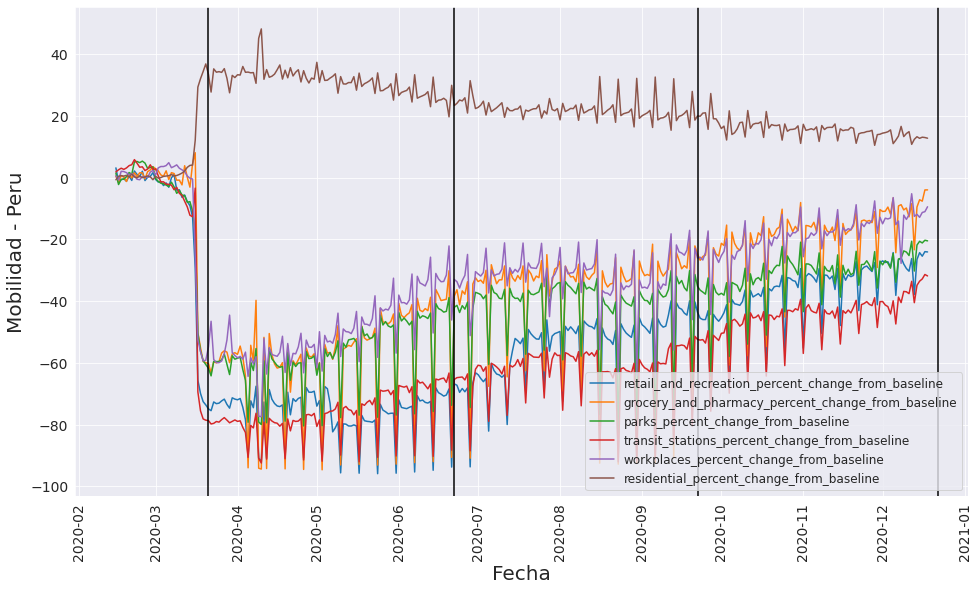

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=data_peru_retail, x="date", y="retail_and_recreation_percent_change_from_baseline", label='retail_and_recreation_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_peru_grocery, x="date", y="grocery_and_pharmacy_percent_change_from_baseline", label='grocery_and_pharmacy_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_peru_parks, x="date", y="parks_percent_change_from_baseline", label='parks_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_peru_transit, x="date", y="transit_stations_percent_change_from_baseline", label='transit_stations_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_peru_workplaces, x="date", y="workplaces_percent_change_from_baseline", label='workplaces_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_peru_residential, x="date", y="residential_percent_change_from_baseline", label='residential_percent_change_from_baseline',  ax=ax)
plt.xticks(rotation=90)

for date in mondays:
    ax.axvline(date, color='black')

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Mobilidad - Peru', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

#index = data_peru['date'].values
#values = data_peru['workplaces_percent_change_from_baseline'].values
#for i,j in zip(index,values):
#        if i in mondays:
#            ax.annotate(str(round(j, 2)),xy=(i,j+0.1), arrowprops=dict(facecolor='black', shrink=0.05),) 
plt.show()

# Arequipa

In [18]:
data_raw_arequipa = data_raw_peru[data_raw_peru['sub_region_2'] == 'Arequipa']
data_raw_arequipa

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
5789,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-02-15,-1.0,-4.0,-2.0,3.0,-1.0,-1.0
5790,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-02-16,-2.0,-5.0,-3.0,6.0,-2.0,-1.0
5791,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-02-17,-1.0,-1.0,1.0,1.0,-2.0,0.0
5792,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-02-18,0.0,-2.0,-4.0,1.0,0.0,1.0
5793,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-02-19,-3.0,0.0,0.0,3.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-12-14,-31.0,-17.0,-18.0,-31.0,-22.0,14.0
6093,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-12-15,-30.0,-12.0,-15.0,-30.0,-23.0,14.0
6094,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-12-16,-30.0,-13.0,-15.0,-28.0,-20.0,15.0
6095,PE,Peru,Arequipa,Arequipa,NaN,NaN,NaN,2020-12-17,-28.0,-9.0,-14.0,-31.0,-21.0,15.0


In [19]:
data_arequipa_retail = data_raw_arequipa[['date','retail_and_recreation_percent_change_from_baseline']]
data_arequipa_grocery = data_raw_arequipa[['date','grocery_and_pharmacy_percent_change_from_baseline']]
data_arequipa_parks = data_raw_arequipa[['date','parks_percent_change_from_baseline']]
data_arequipa_transit = data_raw_arequipa[['date','transit_stations_percent_change_from_baseline']]
data_arequipa_workplaces = data_raw_arequipa[['date','workplaces_percent_change_from_baseline']]
data_arequipa_residential = data_raw_arequipa[['date','residential_percent_change_from_baseline']]

#data_arequipa_retail = data_arequipa_retail.reset_index()
#data_arequipa_grocery = data_arequipa_grocery.reset_index()
#data_arequipa_parks = data_arequipa_parks.reset_index()
#data_arequipa_transit = data_arequipa_transit.reset_index()
#data_arequipa_workplaces = data_arequipa_workplaces.reset_index()
#data_arequipa_residential = data_arequipa_residential.reset_index()

#data_arequipa = pd.concat([data_francia,data_italia,data_españa, data_suiza])

#data_arequipa['pais'] = 'arequipa'

data_arequipa_retail['date'] = pd.to_datetime(data_arequipa_retail['date'])
data_arequipa_grocery['date'] = pd.to_datetime(data_arequipa_grocery['date'])
data_arequipa_parks['date'] = pd.to_datetime(data_arequipa_parks['date'])
data_arequipa_transit['date'] = pd.to_datetime(data_arequipa_transit['date'])
data_arequipa_workplaces['date'] = pd.to_datetime(data_arequipa_workplaces['date'])
data_arequipa_residential['date'] = pd.to_datetime(data_arequipa_residential['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

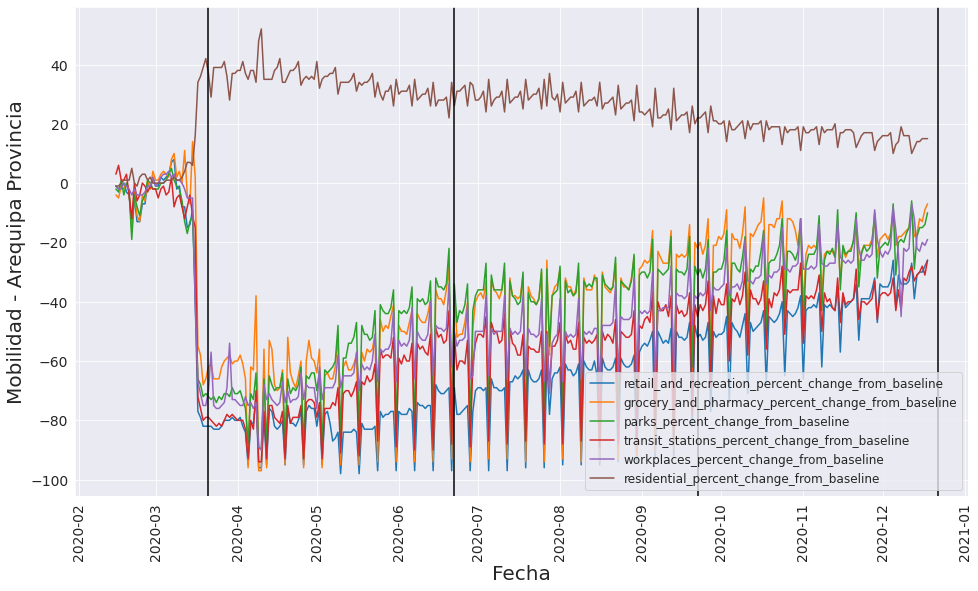

In [20]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=data_arequipa_retail, x="date", y="retail_and_recreation_percent_change_from_baseline", label='retail_and_recreation_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_arequipa_grocery, x="date", y="grocery_and_pharmacy_percent_change_from_baseline", label='grocery_and_pharmacy_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_arequipa_parks, x="date", y="parks_percent_change_from_baseline", label='parks_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_arequipa_transit, x="date", y="transit_stations_percent_change_from_baseline", label='transit_stations_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_arequipa_workplaces, x="date", y="workplaces_percent_change_from_baseline", label='workplaces_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_arequipa_residential, x="date", y="residential_percent_change_from_baseline", label='residential_percent_change_from_baseline',  ax=ax)
plt.xticks(rotation=90)

for date in mondays:
    ax.axvline(date, color='black')

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Mobilidad - Arequipa Provincia', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

#index = data_arequipa['date'].values
#values = data_arequipa['workplaces_percent_change_from_baseline'].values
#for i,j in zip(index,values):
#        if i in mondays:
#            ax.annotate(str(round(j, 2)),xy=(i,j+0.1), arrowprops=dict(facecolor='black', shrink=0.05),) 

plt.show()

# Iquitos

In [21]:
data_raw_peru['sub_region_2'].unique()

array([nan, 'Bagua Province', 'Chachapoyas Province', 'Luya Province',
       'Utcubamba Province', 'Carhuaz Province', 'Casma Province',
       'Huaraz', 'Huari Province', 'Huarmey Province', 'Huaylas Province',
       'Santa', 'Yungay Province', 'Abancay Province',
       'Andahuaylas Province', 'Cotabambas Province', 'Arequipa',
       'Camaná Province', 'Caravelí Province', 'Castilla Province',
       'Caylloma Province', 'Islay Province', 'Huamanga',
       'Huanta Province', 'La Mar Province', 'Lucanas Province',
       'Cajabamba Province', 'Cajamarca', 'Celendín Province',
       'Chota Province', 'Contumazá Province', 'Cutervo Province',
       'Hualgayoc Province', 'Jaén Province', 'San Ignacio Province',
       'Calca Province', 'Canchis Province', 'Cusco', 'Espinar Province',
       'La Convención Province', 'Quispicanchi Province',
       'Urubamba Province', 'Huancavelica Province', 'Tayacaja Province',
       'Huanuco', 'Leoncio Prado Province', 'Chincha Province', 'Ica'

In [22]:
data_raw_maynas = data_raw_peru[data_raw_peru['sub_region_2'] == 'Maynas Province']
data_raw_maynas.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
26806,PE,Peru,Loreto,Maynas Province,NaN,NaN,NaN,2020-12-14,-17.0,9.0,-15.0,-6.0,-6.0,7.0
26807,PE,Peru,Loreto,Maynas Province,NaN,NaN,NaN,2020-12-15,-15.0,8.0,-17.0,-9.0,-10.0,9.0
26808,PE,Peru,Loreto,Maynas Province,NaN,NaN,NaN,2020-12-16,-15.0,15.0,-14.0,-7.0,-7.0,8.0
26809,PE,Peru,Loreto,Maynas Province,NaN,NaN,NaN,2020-12-17,-10.0,18.0,-16.0,-5.0,-6.0,7.0
26810,PE,Peru,Loreto,Maynas Province,NaN,NaN,NaN,2020-12-18,-14.0,14.0,-21.0,-2.0,-1.0,7.0


In [23]:
data_maynas_retail = data_raw_maynas[['date','retail_and_recreation_percent_change_from_baseline']]
data_maynas_grocery = data_raw_maynas[['date','grocery_and_pharmacy_percent_change_from_baseline']]
data_maynas_parks = data_raw_maynas[['date','parks_percent_change_from_baseline']]
data_maynas_transit = data_raw_maynas[['date','transit_stations_percent_change_from_baseline']]
data_maynas_workplaces = data_raw_maynas[['date','workplaces_percent_change_from_baseline']]
data_maynas_residential = data_raw_maynas[['date','residential_percent_change_from_baseline']]

data_maynas_retail['date'] = pd.to_datetime(data_maynas_retail['date'])
data_maynas_grocery['date'] = pd.to_datetime(data_maynas_grocery['date'])
data_maynas_parks['date'] = pd.to_datetime(data_maynas_parks['date'])
data_maynas_transit['date'] = pd.to_datetime(data_maynas_transit['date'])
data_maynas_workplaces['date'] = pd.to_datetime(data_maynas_workplaces['date'])
data_maynas_residential['date'] = pd.to_datetime(data_maynas_residential['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

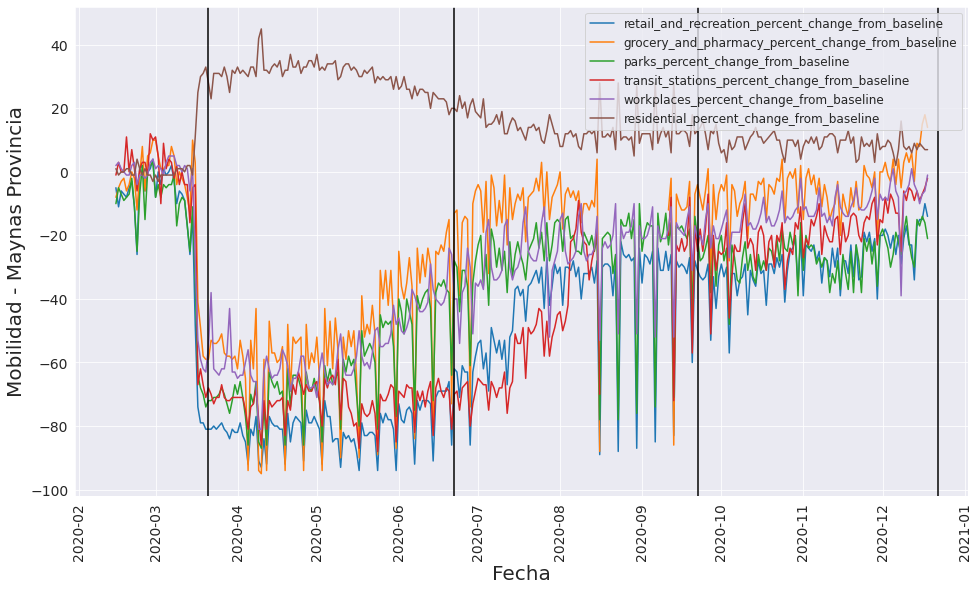

In [24]:
fig, ax = plt.subplots(figsize=(16, 9))
g = sns.lineplot(data=data_maynas_retail, x="date", y="retail_and_recreation_percent_change_from_baseline", label='retail_and_recreation_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_maynas_grocery, x="date", y="grocery_and_pharmacy_percent_change_from_baseline", label='grocery_and_pharmacy_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_maynas_parks, x="date", y="parks_percent_change_from_baseline", label='parks_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_maynas_transit, x="date", y="transit_stations_percent_change_from_baseline", label='transit_stations_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_maynas_workplaces, x="date", y="workplaces_percent_change_from_baseline", label='workplaces_percent_change_from_baseline',  ax=ax)
g = sns.lineplot(data=data_maynas_residential, x="date", y="residential_percent_change_from_baseline", label='residential_percent_change_from_baseline',  ax=ax)
plt.xticks(rotation=90)

for date in mondays:
    ax.axvline(date, color='black')

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Mobilidad - Maynas Provincia', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=12)

#index = data_maynas['date'].values
#values = data_maynas['workplaces_percent_change_from_baseline'].values
#for i,j in zip(index,values):
#        if i in mondays:
#            ax.annotate(str(round(j, 2)),xy=(i,j+0.1), arrowprops=dict(facecolor='black', shrink=0.05),) 

plt.show()